---
# **DESAFIO MÓDULO 2 BOOTCAMP ENG. MACHINE LEARNING**
---

In [43]:
# importando bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, plot_roc_curve
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [44]:
def distance_max(data):
  name_var = ''
  valor_atual = 0
  maior_valor = 0
  i = 0
  for column in data.columns:
    valor_atual = (data[column].max()) - (data[column].min())
    if i == 0:
      name_var = str(data[column])
      valor_atual = maior_valor
    elif (valor_atual > maior_valor):
        maior_valor = valor_atual
        name_var = column + ' = ' + str(maior_valor)
    i = i + 1
  return name_var

In [45]:
df = pd.read_csv('https://pycourse.s3.amazonaws.com/banknote_authentication.txt',
                  sep=',',
                  names=["variance", "skewness", "curtosis", "entropy", "class"])
print('Qual variável possui o maior range (diferença entre valor máximo e mínimo)?  \n R: '+ distance_max(df))
print('Qual o tamanho desse dataset (número de linhas, número de colunas)? \n R: '+ str(df.shape))

Qual variável possui o maior range (diferença entre valor máximo e mínimo)?  
 R: skewness = 26.7247
Qual o tamanho desse dataset (número de linhas, número de colunas)? 
 R: (1372, 5)


In [46]:
# Respostas para a pergunta 3,4,5 e 6
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [47]:
media_cel_false = df['class'].value_counts()[1]/len(df)*100
print('Qual a porcentagem de exemplos do dataset que são cédulas falsas (class=1)? \n R: '+str(media_cel_false))

Qual a porcentagem de exemplos do dataset que são cédulas falsas (class=1)? 
 R: 44.460641399416915


Qual o valor da correlação de Pearson entre as variáveis skewness e curtosis? 
 R: -0.8


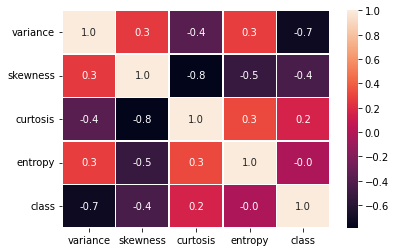

In [48]:
correlation = df.corr()
plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)

print('Qual o valor da correlação de Pearson entre as variáveis skewness e curtosis? \n R: -0.8')
plot

In [49]:
# extraindo as matrizes X e y
X = df.iloc[:,:4]
y = df.iloc[:,4]
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [50]:
# Separando conjunto de treino(70%) e teste(30%) e estratificando o y para não haver desbalaço de classes no treino e teste 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) 

In [51]:
#aplicando um modelo de classificação knn

clf_KNN = KNeighborsClassifier(n_neighbors=5)
clf_KNN.fit(x_train, y_train)
y_previsto_KNN = clf_KNN.predict(x_test)

#aplicando um modelo de classificação árvore de decisão
clf_arvore = DecisionTreeClassifier(random_state=1) 
clf_arvore.fit(x_train, y_train) 
y_previsto_arvore_decisao = clf_arvore.predict(x_test) 

#aplicando o modelo Random Forest
clf_floresta = RandomForestClassifier(max_depth=8, random_state=1)
clf_floresta.fit(x_train, y_train)
y_previsto_floresta = clf_floresta.predict(x_test)

#aplicando o modelo SVM
clf_svm = SVC(gamma='auto',kernel='rbf', random_state=1)
clf_svm.fit(x_train, y_train)
y_previsto_SVM = clf_svm.predict(x_test)

#aplicando o modelo Rede MLP
clf_mlp = MLPClassifier(hidden_layer_sizes=(2,), solver='lbfgs', random_state=1)
clf_mlp.fit(x_train, y_train)
y_previsto_MLP = clf_mlp.predict(x_test)


In [52]:
#vendo as acurácias
acuracia_arvore_decisao = accuracy_score(y_test, y_previsto_arvore_decisao)
acuracia_KNN = accuracy_score(y_test, y_previsto_KNN)
acuracia_floresta = accuracy_score(y_test, y_previsto_floresta)
acuracia_SVM = accuracy_score(y_test, y_previsto_SVM)
acuracia_MLP = accuracy_score(y_test, y_previsto_MLP)

#construção da matriz de confusão para facilitar
matriz_confusao_arvore_decisao = confusion_matrix(y_test, y_previsto_arvore_decisao)
matriz_confusao_KNN = confusion_matrix(y_test, y_previsto_KNN)
matriz_confusao_floresta = confusion_matrix(y_test, y_previsto_floresta)
matriz_confusao_SVM = confusion_matrix(y_test, y_previsto_SVM)
matriz_confusao_MLP = confusion_matrix(y_test, y_previsto_MLP)

#resultado detalhado da classificação
print('ARVORE DE DECISÃO')
print(classification_report(y_test,y_previsto_arvore_decisao))
print('KNN')
print(classification_report(y_test,y_previsto_KNN))
print('RANDOM FLOREST')
print(classification_report(y_test,y_previsto_floresta))
print('SVM')
print(classification_report(y_test,y_previsto_SVM))
print('MLP')
print(classification_report(y_test,y_previsto_MLP))

ARVORE DE DECISÃO
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       229
           1       0.97      0.98      0.98       183

    accuracy                           0.98       412
   macro avg       0.98      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412

KNN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      1.00      1.00       183

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412

RANDOM FLOREST
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       0.99      1.00      1.00       183

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00    

In [53]:
#Respostas para as questões 9, 10, 11, 14 e 15 do desafio
acuracias = dict({'Decision Tree': acuracia_arvore_decisao, 'KNN': acuracia_KNN, 'Randon Florest': acuracia_floresta, 'SVM': acuracia_SVM, 'MLP': acuracia_MLP})
acuracias

{'Decision Tree': 0.9805825242718447,
 'KNN': 1.0,
 'MLP': 1.0,
 'Randon Florest': 0.9975728155339806,
 'SVM': 1.0}

ARVORE DE DECISÃO


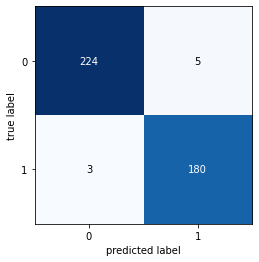

KNN


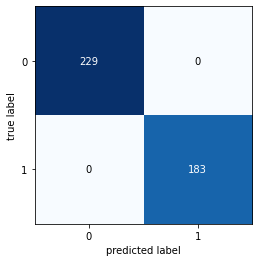

RANDOM FLOREST


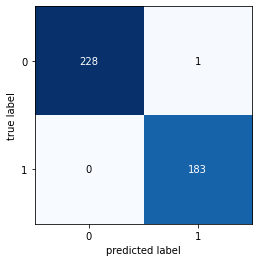

SVM


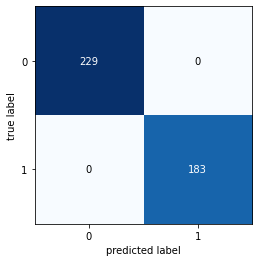

MLP


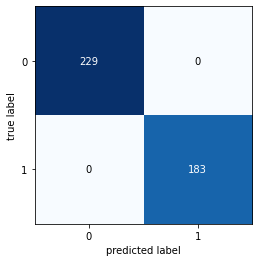

In [54]:
print('ARVORE DE DECISÃO')
fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao_arvore_decisao)
plt.show()
print('KNN')
fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao_KNN)
plt.show()
print('RANDOM FLOREST')
fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao_floresta)
plt.show()
print('SVM')
fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao_SVM)
plt.show()
print('MLP')
fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao_MLP)
plt.show()

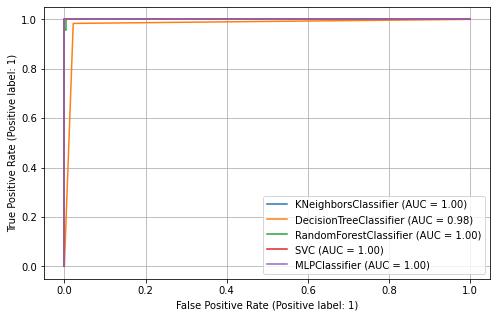

In [55]:
# curva ROC 
fig, ax = plt.subplots(figsize=(8, 5))
plot_roc_curve(clf_KNN, x_test, y_test, ax=ax)
plot_roc_curve(clf_arvore, x_test, y_test, ax=ax)
plot_roc_curve(clf_floresta, x_test, y_test, ax=ax)
plot_roc_curve(clf_svm, x_test, y_test, ax=ax)
plot_roc_curve(clf_mlp, x_test, y_test, ax=ax)
ax.grid()
plt.show()

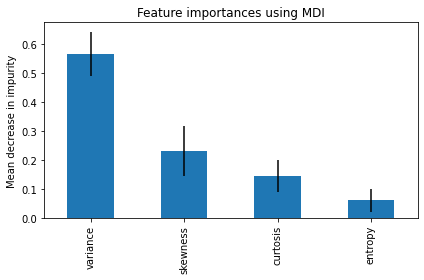

In [56]:
#Respostas para as questões 12 e 13, sobre importância relativa das features do Random Forest
feature_names = []
for col_name in df.columns: 
    feature_names.append(col_name)
feature_names.remove('class')

#código coletado de: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
importances = clf_floresta.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_floresta.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

---
# **EXTRA DESAFIO**
---



---


De acordo com a matriz de correlação as **features "variance" e "skewness"** são as mais relavantes para a classificação, sabendo disso vamos plotar como está se comportando o modelo de classificação.
EXTRA DESAFIO.

---



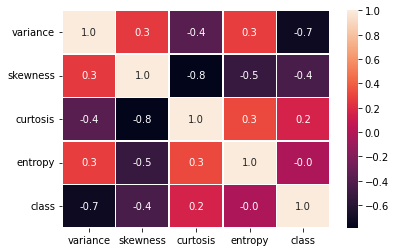

In [57]:
correlation = df.corr()
plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

In [58]:
# visualização da superfície de decisão
def plot_decision_boundary(X_set,
                           y_set,
                           classifier,
                           xlabel='',
                           ylabel='',
                           title=''):
  # visualizando a superfície de separação da predição
  plt.figure(figsize=(4,4))
  X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                                 stop = X_set[:, 0].max() + 1,
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1,
                                 stop = X_set[:, 1].max() + 1,
                                 step = 0.01))
  plt.contourf(X1, X2,
               classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.2, cmap = ListedColormap(('red', 'green')))
  plt.xlim(X1.min(), X1.max())
  plt.ylim(X2.min(), X2.max())
  for i, j in enumerate(np.unique(y_set)):
      plt.plot(X_set[y_set == j, 0], X_set[y_set == j, 1],'o',
                  c=ListedColormap(('red', 'green'))(i),label=j)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.legend()
  plt.show()

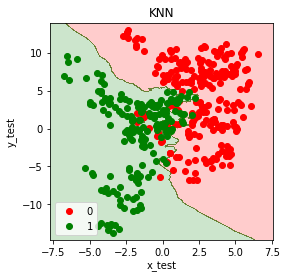

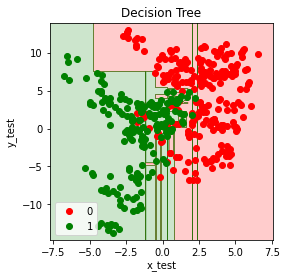

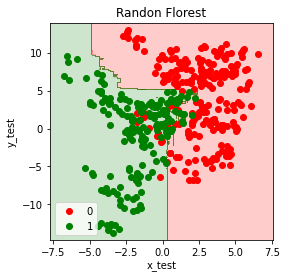

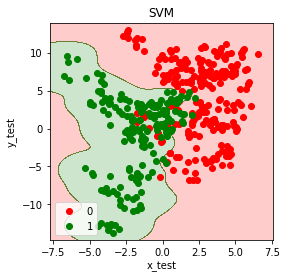

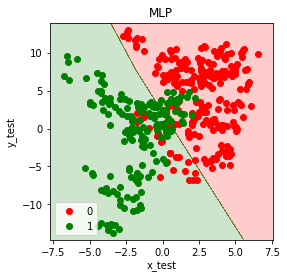

In [61]:
# extraindo as matrizes X e y
X = np.array(df.iloc[:,:2])
y = np.array(df.iloc[:,4])

# Separando conjunto de treino(70%) e teste(30%) e estratificando o y para não haver desbalaço de classes no treino e teste 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) 


#aplicando um modelo de classificação knn
clf_KNN = KNeighborsClassifier(n_neighbors=5)
clf_KNN.fit(x_train, y_train)

#aplicando um modelo de classificação árvore de decisão
clf_arvore = DecisionTreeClassifier(random_state=1) 
clf_arvore.fit(x_train, y_train) 

#aplicando o modelo Random Forest
clf_floresta = RandomForestClassifier(max_depth=8, random_state=1)
clf_floresta.fit(x_train, y_train)

#aplicando o modelo SVM
clf_svm = SVC(gamma='auto',kernel='rbf', random_state=1)
clf_svm.fit(x_train, y_train)

#aplicando o modelo Rede MLP
clf_mlp = MLPClassifier(hidden_layer_sizes=(2,), solver='lbfgs', random_state=1)
clf_mlp.fit(x_train, y_train)

plot_decision_boundary(X_set=x_test,
                       y_set=y_test,
                       classifier=clf_KNN,
                       xlabel='x_test',
                       ylabel='y_test',
                       title='KNN')

plot_decision_boundary(X_set=x_test,
                       y_set=y_test,
                       classifier=clf_arvore,
                       xlabel='x_test',
                       ylabel='y_test',
                       title='Decision Tree')

plot_decision_boundary(X_set=x_test,
                       y_set=y_test,
                       classifier=clf_floresta,
                       xlabel='x_test',
                       ylabel='y_test',
                       title='Randon Florest')

plot_decision_boundary(X_set=x_test,
                       y_set=y_test,
                       classifier=clf_svm,
                       xlabel='x_test',
                       ylabel='y_test',
                       title='SVM')

plot_decision_boundary(X_set=x_test,
                       y_set=y_test,
                       classifier=clf_mlp,
                       xlabel='x_test',
                       ylabel='y_test',
                       title='MLP')
